In [1]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import numpy as np
import seaborn as sns


In [2]:
PATH = "D:\\COLLEGE\\THESIS\\Feature Engineering\\FeatureEngineering_TimeSeries\\For Correlation\\"
rolling_traffic_filename = "Expanding and Rolling\\eng_mmda_Vicente Cruz_2015_seasonWet.csv"
rolling_weather_filename = "Expanding and Rolling\\eng_wwo_Vicente Cruz_2015_seasonWet.csv"
expanding_merged_filename = "Expanding and Rolling\\ENGINEER_normalized_mmda_wwo_Vicente Cruz_2015_seasonWet.csv"
columns_included = []

In [3]:
rolling_traffic = pd.read_csv(PATH + rolling_traffic_filename , skipinitialspace = True, encoding = "ISO-8859-1")
rolling_weather = pd.read_csv(PATH + rolling_weather_filename , skipinitialspace = True, encoding = "ISO-8859-1")
expanding_merged = pd.read_csv(PATH + expanding_merged_filename , skipinitialspace = True, encoding = "ISO-8859-1")

## Pre-processes

In [38]:
def getAllHighCorr(LIST):
    y_max = max(LIST)
    y_min =  min(LIST)
    max_index = 0
    if(y_max > abs(y_min)):
        max_index = LIST.index(y_max,inplace=True)
    else:
        max_index = LIST.index(y_min,inplace=True)
    return max_index

In [ ]:
Original_FEATURES = expanding_merged.columns[1:15]
FEATURES = Original_FEATURES


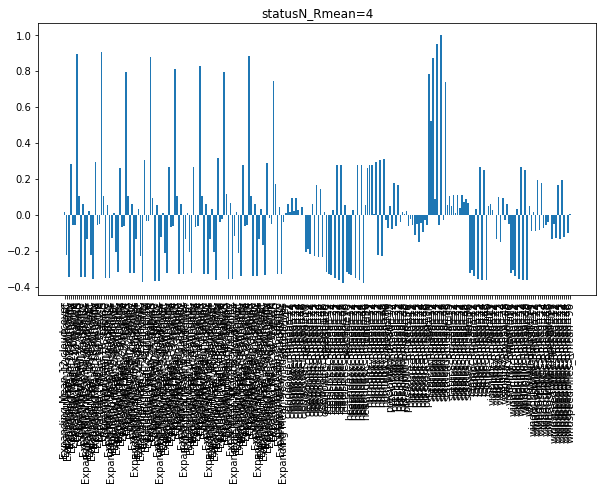

Highest Corr: 


TypeError: 'RangeIndex' object is not callable

In [39]:
RWindow = 4
data = pd.read_csv(PATH + rollingOnly + "Correlated_Rolling_Window_" + str(RWindow) + ".csv" , skipinitialspace = True, encoding = "ISO-8859-1")
data.head()
features = data.columns.tolist()
col = data['0']
for f in range(1, len(features)): 
    plt.bar(col, data[features[f]])
    plt.title(features[f])
    plt.xticks(rotation='vertical')
    plt.rcParams["figure.figsize"] = 10,5
    plt.show()
    
    print("Highest Corr: ")
    maxI = getAllHighCorr(data[features[f]])
    print(col[maxI] + " : " + data[features[f]][maxI])

## HeatMap

In [ ]:
FEATURES = expanding_merged.columns[1:15]
merged_dataset = pd.DataFrame(expanding_merged[FEATURES[2]])
variable = "tempC"
for n in range(2,len(FEATURES)):
    merged_dataset = pd.concat([merged_dataset, expanding_merged[FEATURES[n]]], axis = 1)
print("OG Done")

FEATURES = rolling_weather.columns
for n in range(3,len(FEATURES)):
    if ("mean") in FEATURES[n]:
        if variable in FEATURES[n]:
            merged_dataset = pd.concat([merged_dataset, rolling_weather[FEATURES[n]]], axis = 1)
        
print("Rolling W Done")
        
FEATURES = expanding_merged.columns
for n in range(1,len(FEATURES)):
    if "Mean" in FEATURES[n]:
        if variable in FEATURES[n]:
            merged_dataset = pd.concat([merged_dataset, expanding_merged[FEATURES[n]]], axis = 1)
        
print("Expanding Done")

correlation = merged_dataset.corr(method='spearman')

# correlation = pd.concat([correlation,FEATURES], axis = 1)
correlation.to_csv(PATH + "Expanding and Rolling Result\\Correlated_tempC_only.csv", encoding='utf-8', index=False)


# plot it
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation.columns),1)
ax.set_yticks(ticks)
ticks = np.arange(0,len(correlation.columns),1)
ax.set_xticks(ticks)
ax.set_yticklabels(correlation.columns)
plt.rcParams["figure.figsize"] = 10,10
plt.show()



print('DONE')